In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
np.random.seed(42)

In [3]:
plt.rcParams['figure.figsize'] = (10,4)

In [4]:
def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

In [14]:
def print_test(x, name='series'):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistic: {a['test_stat']:.2f} p={a['pvalue']:.2f}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.2f} p={k['pvalue']:.2f}")
  except:
    print("KPSS test failed")

In [7]:
def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys, [res[i] for i in range(6)]))

In [8]:
def kpss_test(x, regression='c', nlags='auto'):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {'test_stat': stat,
          'pvalue': pval,
          'lags': lags,
          'crit_values': crit,
          'regression': regression}

In [9]:
def rolling_mean_var(s, window=24, title="Rolling Mean & Var"):
  rolling_mean = s.rolling(window=window).mean()
  rolling_var = s.rolling(window=window).var()
  fig, ax = plt.subplots(2,1, figsize=(10,6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + " - Rolling Mean")
  ax[1].plot(rolling_var, label="Rolling Var")
  ax[1].legend()
  ax[1].set_title(title + " - Rolling Var")
  plt.show()

In [11]:
n = 240 # months
t = np.arange(n)

# Stationary: white noise
white_noise = pd.Series(np.random.normal(0,1,n))

# Non-Stationary
trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0,1,n))

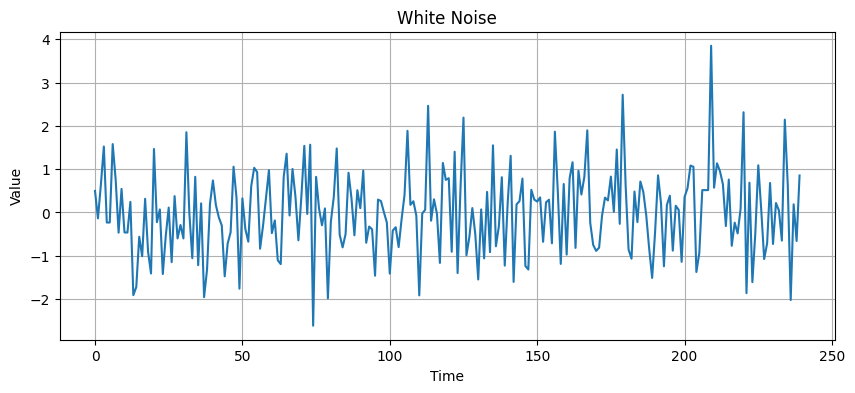

Test White Noise
ADF Statistic: -16.11 p=0.00
KPSS: stat=0.30 p=0.10


/tmp/ipython-input-3788079080.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


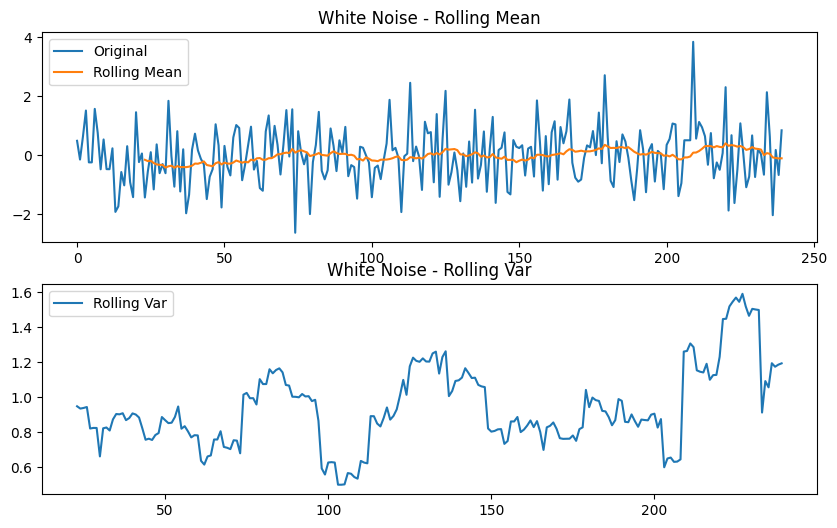

In [15]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

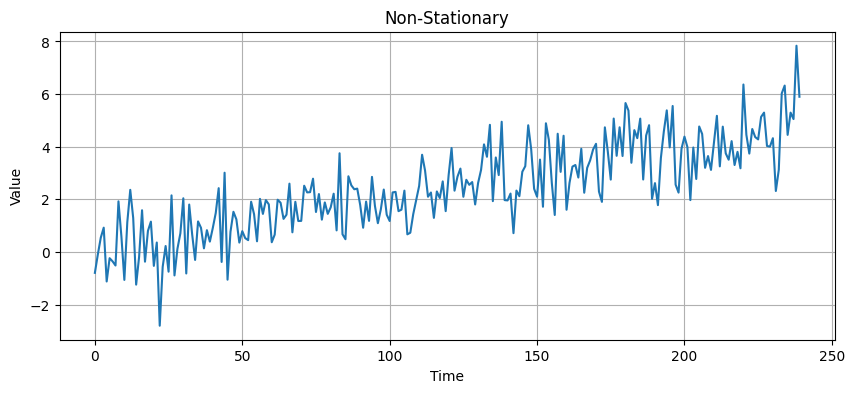

Test Non-Stationary
ADF Statistic: -0.06 p=0.95
KPSS: stat=2.42 p=0.01


/tmp/ipython-input-3788079080.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


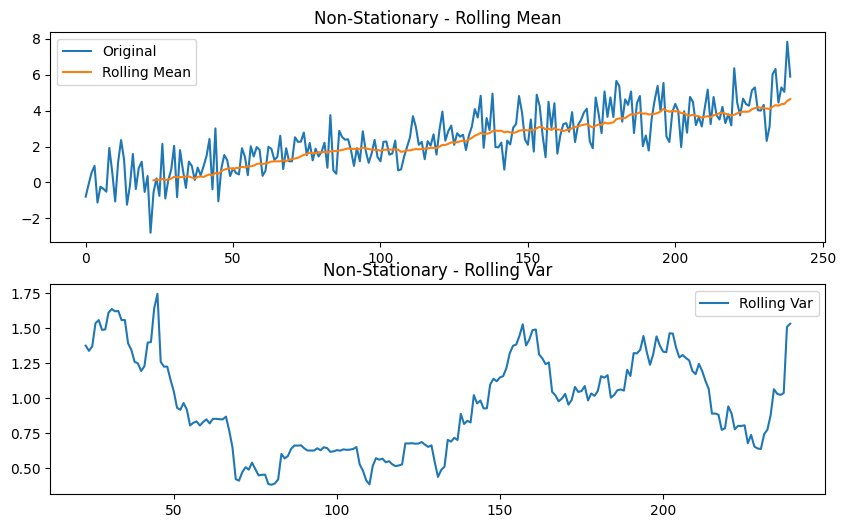

In [16]:
plot_series(trended, "Non-Stationary")
print_test(trended, "Non-Stationary")
rolling_mean_var(trended, window=24, title="Non-Stationary")